In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Helper import *

In [2]:
# constants
playersTraining = [2, 7, 11, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54]
playersBaseline = [4, 9, 13, 16, 19, 24, 28, 31, 36, 39]
playersOptimal  = [3, 8, 12, 15, 20, 23, 27, 32, 35, 40]
path = "E:\\Andreea\\Master\\Thesis\\Git\\TheOne\\SmartuistWrapper\\tapResultParticipants.csv"

In [3]:
def getStatisticsPhase3(results, players):
    mvmTime = [] 
    gain = []
    for p in players:
        tmp = results[p]
        time = 0
        print(p, getGainPerPlayer(p, results))
        gain.append(getGainPerPlayer(p, results))
        for words in tmp:
            time += float(words[10])
        mvmTime.append(time/1000) # time in seconds
    return (mvmTime, gain)

# gain = (gainEffort + gainTH) / 2
def getGainPerPlayer(p, results):
    gain = [] 
    batchSize = 10
    nrLessons = 2
    playerResults = results[p]
    
    for l in range(nrLessons):
        stupidTh = 0 
        sumTh = 0
        bodyParts =[ 0 for i in range(7)]
        for res in playerResults: #results for a repetition  
            if(l == int(res[1])):
                for i in range (7):
                    bodyParts[i] += 1 / float(res[21+i])
                sumTh += float(res[13])
                stupidTh += sumTh
        
        bodyParts = [ x / batchSize for x in bodyParts]
        gainEffort = sum(bodyParts) / len(bodyParts)
        gainTh = stupidTh / batchSize
        gain.append((gainEffort + gainTh) / 2)
    
    return np.average(gain) 
        
results = readFromFile(path, 0)
getGainPerPlayer(14, results)

11.800887139845853

In [4]:
mvmTimeBaseline, gainBaseline = getStatisticsPhase3(results, playersBaseline)
mvmTimeOptimal, gainOptimal = getStatisticsPhase3(results, playersOptimal)

4 8.70639075096564
9 9.829848363851488
13 9.469337582651288
16 8.544675731346432
19 8.584012867203874
24 11.973703161587729
28 7.299285795469684
31 8.758831472375315
36 9.538478540745093
39 12.17901839466335
3 14.8568070032496
8 11.956338312349619
12 12.141329051375752
15 11.137482480495187
20 11.678814401559436
23 15.882664586289026
27 9.485146607467332
32 13.4664644388528
35 17.976802399078345
40 15.790566769341654


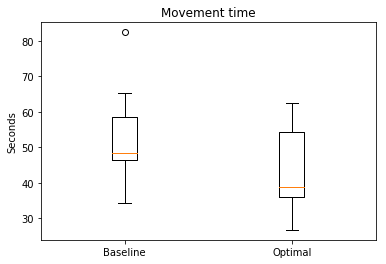

In [5]:
plt.boxplot([mvmTimeBaseline, mvmTimeOptimal], labels= ["Baseline", "Optimal"])
plt.title("Movement time")
plt.ylabel("Seconds")
plt.show()

[8.70639075096564, 9.829848363851488, 9.469337582651288, 8.544675731346432, 8.584012867203874, 11.973703161587729, 7.299285795469684, 8.758831472375315, 9.538478540745093, 12.17901839466335]
[14.8568070032496, 11.956338312349619, 12.141329051375752, 11.137482480495187, 11.678814401559436, 15.882664586289026, 9.485146607467332, 13.4664644388528, 17.976802399078345, 15.790566769341654]


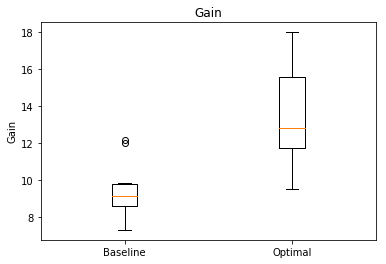

In [6]:
plt.boxplot([gainBaseline, gainOptimal], labels= ["Baseline", "Optimal"])
plt.title("Gain")
plt.ylabel("Gain")
plt.show
print(gainBaseline)
print(gainOptimal)